# Book

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#import numpy as np

from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.model_selection import train_test_split as TTS
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

In /home/q-pi/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/q-pi/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/q-pi/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/q-pi/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/q-pi/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_c

In [5]:
df = sns.load_dataset('iris')

In [6]:
target_feature_name = 'species'
Y = df[target_feature_name]
X = df.drop(columns=target_feature_name)

In [7]:
classes = Y.astype('category').cat.categories.tolist()

In [8]:
X_tr, X_te, Y_tr, Y_te = TTS(X, Y, stratify=Y, random_state=42)

In [6]:
pipeline_details = [('PCA', PCA(random_state=20)),
                    ('RF', RF())]
pipeline = Pipeline(steps=pipeline_details)

In [7]:
hyperparameters = {}
hyperparameters['PCA__n_components'] = [i for i in range(1, X_tr.shape[1]+1)]
hyperparameters['RF__n_estimators']  = [i for i in range(10, 250 +1, 10)]

In [8]:
hyperparameter_search = GridSearchCV(pipeline,
                                     hyperparameters,
                                     scoring='accuracy', 
                                     cv=5)

In [9]:
hyperparameter_search.fit(X_tr, Y_tr)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('PCA', PCA(random_state=20)),
                                       ('RF', RandomForestClassifier())]),
             param_grid={'PCA__n_components': [1, 2, 3, 4],
                         'RF__n_estimators': [10, 20, 30, 40, 50, 60, 70, 80,
                                              90, 100, 110, 120, 130, 140, 150,
                                              160, 170, 180, 190, 200, 210, 220,
                                              230, 240, 250]},
             scoring='accuracy')

In [10]:
print('Meilleur score : {:.5f}'.format(hyperparameter_search.best_score_))
print('Meilleur paramètres : {}'.format(hyperparameter_search.best_params_))

Meilleur score : 0.94625
Meilleur paramètres : {'PCA__n_components': 3, 'RF__n_estimators': 150}


In [11]:
N=hyperparameter_search.best_params_['PCA__n_components']
pca = PCA(n_components=N, random_state=20)
pca.fit(X_tr);

In [12]:
X_tr_PCA = pca.transform(X_tr)
X_te_PCA = pca.transform(X_te)

In [13]:
N=hyperparameter_search.best_params_['RF__n_estimators']
rf = RF(n_estimators=N)
rf.fit(X_tr_PCA, Y_tr);

In [14]:
train_preds = rf.predict(X_tr_PCA)

In [15]:
accuracy = lambda p, y : (p==y).sum()/len(y)
print('Accuracy : {}'.format(accuracy(train_preds, Y_tr)))

Accuracy : 1.0


In [16]:
df = pd.DataFrame(X_te_PCA)

In [17]:
preds = rf.predict(df)
proba = rf.predict_proba(df)

In [18]:
df = pd.DataFrame(X_te)
df['Predictions'] = preds
for i in range(0, len(proba[0])):
    df[classes[i]] = proba[:, i]

In [19]:
df

,sepal_length,sepal_width,petal_length,petal_width,Predictions,setosa,versicolor,virginica
42,4.4,3.2,1.3,0.2,setosa,0.720000,0.280000,0.000000
56,6.3,3.3,4.7,1.6,virginica,0.093333,0.420000,0.486667
99,5.7,2.8,4.1,1.3,versicolor,0.073333,0.900000,0.026667
53,5.5,2.3,4.0,1.3,versicolor,0.013333,0.773333,0.213333
38,4.4,3.0,1.3,0.2,setosa,0.860000,0.140000,0.000000
85,6.0,3.4,4.5,1.6,virginica,0.086667,0.446667,0.466667
134,6.1,2.6,5.6,1.4,virginica,0.046667,0.380000,0.573333
141,6.9,3.1,5.1,2.3,virginica,0.060000,0.040000,0.900000
107,7.3,2.9,6.3,1.8,virginica,0.000000,0.166667,0.833333
132,6.4,2.8,5.6,2.2,virginica,0.006667,0.086667,0.906667


In [20]:
from sklearn.metrics import confusion_matrix
def show_cm(cm, labels):
    df_cm = pd.DataFrame(cm, labels, labels)
    sns.heatmap(df_cm, annot=True)
    plt.show()

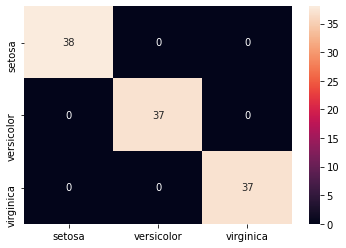

Accuracy : 1.0


In [21]:
cm_train = confusion_matrix(train_preds, Y_tr, labels=classes)
show_cm(cm_train, classes)
#Accuracy du training
accuracy = lambda p, y : (p==y).sum()/len(y)
print('Accuracy : {}'.format(accuracy(train_preds, Y_tr)))

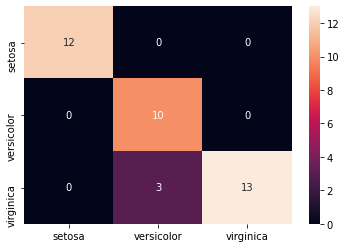

Accuracy : 0.9210526315789473


In [22]:
cm_test = confusion_matrix(preds, Y_te, labels=classes)
show_cm(cm_test, classes)
#Accuracy du training
accuracy = lambda p, y : (p==y).sum()/len(y)
print('Accuracy : {}'.format(accuracy(preds, Y_te)))

In [23]:
from joblib import dump
dump(rf, "model.joblib")

['model.joblib']

In [24]:
dump(pca, "pca.joblib")

['pca.joblib']

In [34]:
dump(X_tr.columns.to_list(), "features.joblib")

['features.joblib']

In [37]:
dump(classes, "labels.joblib")

['labels.joblib']

In [9]:
dump(X_tr.dtypes, "utils/features_type.joblib")

['utils/features_type.joblib']

In [2]:
from joblib import dump